<center> <h1> Assemblage matrix of stiffness, mass and load vector </h1> </center>
<center> <h2> Numerical Analisys II - 2022 </h2> </center>
<center> <h3> Base Codes </h3> </center>

In [1]:
function Stiffness1D_Hom(x,p)
    # Stiffness matrix for homogeneous Dirichlet problem.
    # x = LinRange(0,1,11) ;  
    # p(x) = x^3-0.18*x^2 + 691e-6;
    # A = EnsambleRigidez1D_Hom(x,p);

    n = size(x)[1]-2;    #x0< x1 < ... < xN n+1 puntos en la malla %
    A = zeros(n,n);
    A[1,1]= p(0.5*(x[2]+ x[1])) / (x[2]- x[1]);
    A[n,n]= p( 0.5*(x[n+2]+ x[n+1]) )/ ( x[n+2] - x[n+1]);
    for i in 2:n
        h = x[i+1] - x[i];
        xmid = (x[i+1] + x[i]) / 2;       # midpoint of interval
        pmid = p(xmid);                   # p(x) value in the midpoint
        A[i-1,i-1] += pmid/h; # sum pmid/h a A(i-1,i-1)
        A[i-1,i]   -= pmid/h;
        A[i,i-1]   -= pmid/h;
        A[i,i]     += pmid/h;
    end
    return A
end

x    = 0:0.1:1;  
p(x) = x^3 - 0.18*x^2 + 691e-6;
A    = Stiffness1D_Hom(x,p)
A

9×9 Matrix{Float64}:
  0.00382  -0.00016   0.0       0.0      …   0.0       0.0       0.0
 -0.00016   0.05082  -0.05066   0.0          0.0       0.0       0.0
  0.0      -0.05066   0.26582  -0.21516      0.0       0.0       0.0
  0.0       0.0      -0.21516   0.76882      0.0       0.0       0.0
  0.0       0.0       0.0      -0.55366      0.0       0.0       0.0
  0.0       0.0       0.0       0.0      …  -1.99266   0.0       0.0
  0.0       0.0       0.0       0.0          5.20582  -3.21316   0.0
  0.0       0.0       0.0       0.0         -3.21316   8.06082  -4.84766
  0.0       0.0       0.0       0.0          0.0      -4.84766  11.8038

In [2]:
function Load1D_hom(x,f)
    # Load vector homogeneous Dirichlet problem.
    # x = LinRange(0,1,11);
    # f(x) = x^3-0.18*x^2 + 691e-6);
    # b = EnsambleCarga1D_hom(x,f);

    n    = size(x,1)-2;
    b    = zeros(n,1);
    b[1] = 0.5* f(x[1])* (x[2]- x[1]);
    b[n] = 0.5* f(x[n+2])* (x[n+2]- x[n+1]);
    for i in 2:n
        h      = x[i+1] - x[i];
        b[i-1] += f(x[i-1])*h/2;
        b[i]   += f(x[i])*h/2;
    end
    return b
end

x    = LinRange(0,1,11);
f(x) = x^3-0.18*x^2 + 691e-6;
b    = Load1D_hom(x,f);
b

9×1 Matrix{Float64}:
  6.91e-5
 -1.0900000000000014e-5
  0.00014910000000000005
  0.0011491000000000001
  0.0035891
  0.008069099999999997
  0.015189100000000004
  0.025549099999999998
  0.060909099999999994

In [3]:
function Mass1D_Hom(x,r)
    # Mass matrix for homogeneous Dirichlet problem.
    # x    = LinRange(0,1,11);
    # r(x) = x^3-0.18*x^2 + 691e-6
    # M    = EnsambleMasa1D_Hom(x,r);

    n = size(x,1)-2;
    M = zeros(n,n);  
    M[1,1] =  r( 0.5*(x[2]+ x[1]) )* ( x[2]- x[1])/3;
    M[n,n] =  r( 0.5*(x[n+2]+ x[n+1]) )*  ( x[n+2] - x[n+1])/3;
    for i in 2:n 
        h = x[i+1] - x[i];        # Interval lenght
        xmid = (x[i+1] + x[i])/2; # midpoint of interval
        rmid = r(xmid);           # r(x) value to midpoint of interval
        M[i-1,i-1] += rmid*h/3; # sum rmid*h/3 a M(i,i)
        M[i-1,i]   += rmid*h/6;
        M[i  ,i-1] += rmid*h/6;
        M[i  ,i]   += rmid*h/3;
    end
    return M
end

x    = LinRange(0,1,11);
r(x) = x^3-0.18*x^2 + 691e-6;
M    = Mass1D_Hom(x,r);
M

9×9 Matrix{Float64}:
 1.27333e-5  2.66667e-7  0.0          …  0.0         0.0         0.0
 2.66667e-7  0.0001694   8.44333e-5      0.0         0.0         0.0
 0.0         8.44333e-5  0.000886067     0.0         0.0         0.0
 0.0         0.0         0.0003586       0.0         0.0         0.0
 0.0         0.0         0.0             0.0         0.0         0.0
 0.0         0.0         0.0          …  0.0033211   0.0         0.0
 0.0         0.0         0.0             0.0173527   0.00535527  0.0
 0.0         0.0         0.0             0.00535527  0.0268694   0.00807943
 0.0         0.0         0.0             0.0         0.00807943  0.0393461

# Example

$$ \eta_i = h_i ||f+u_h''|| \qquad, \text{with} \qquad u_h=0 \qquad \text{()}$$,

In [4]:
function Refine(Ruh, x)
    alpha = 0.9
    for i=1:size(Ruh,1)
       if Ruh[i] > alpha*maximum(Ruh)
            x = [x; (x[i]+x[i+1])/2]     
       end
    end
    return sort(x)
end

function ResiudalError(x,f) #Ruh
    n = size(x,1)-1
    Ruh = zeros((n,1))
    for i=1:n
        h = x[i+1] - x[i]
        a, b = f(x[i]), f(x[i+1])
        t = (a^2 + b^2) * h/2
        Ruh[i] = h*sqrt(t)
    end
    return Ruh
end

ResiudalError (generic function with 1 method)

In [5]:
using PlotlyJS, LinearAlgebra

WebIO._IJuliaInit()

$$ -(pu')'+u'=f, \quad u=u(x)$$


$$-u'' = f=e^{-100|x-0.5|^2}\\
u(0)=0, \qquad u(1)=0$$

In [6]:
function SolveEq(Nmax, p, r, f, flag, g)
    #a, b = 0, 1;
    N = 10 #500
    #h = (b-a) / N
    
    h = 1/N
    x = 0:h:1
    
    # Linear system
    A  = Stiffness1D_Hom(x,p);
    M  = Mass1D_Hom(x,r);
    bc = Load1D_hom(x,f);

    # ------  Solution
    ua, ub = 0, 0; #Dirichle homogeneous conditions
    sol = [ua; (A + M) \ bc; ub]

    n, x_cop = 1, copy(x)
    
    # Refinamiento
    while n < Nmax
        Ruh = ResiudalError(x_cop,f);
        x_cop  = Refine(Ruh, x_cop);        
        
        n += 1
    end
    
    A  = Stiffness1D_Hom(x_cop,p);
    M  = Mass1D_Hom(x_cop,r);
    bc = Load1D_hom(x_cop,f);

    solx = [ua; (A + M) \ bc; ub];
    Np = size(solx,1);

    if flag == 1
            P = scatter(x=Array(x_cop),y=g(Array(x_cop),solx[:,1]),  mode="markers+lines", name="Refined: Nmax $Nmax, $Np points", marker=attr(size=5));
    else
        P = scatter(x=Array(x_cop),y=g(Array(x_cop),solx[:,1]),  mode="markers", name="Refined: Nmax $Nmax, $Np points", marker=attr(size=5));
    end

    return x, sol, N, P
end

SolveEq (generic function with 1 method)

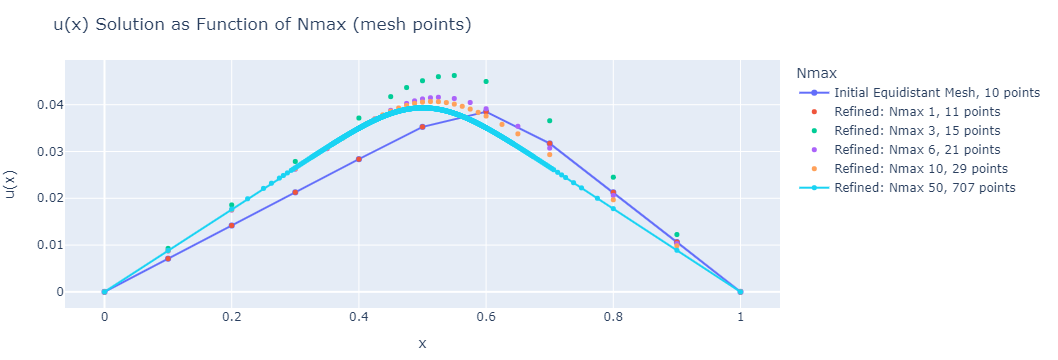

In [7]:
c = 100;
p(x) = 1;
r(x) = 0;
f(x) = exp(-c*abs(x-0.5)^2);
g(x,y) = y #function to plot

x, sol, N1,  p1  = SolveEq(1,  p, r, f, 0, g);   
_, _,   N2,  p2  = SolveEq(3,  p, r, f, 0, g); 
_, _,   N5,  p5  = SolveEq(6,  p, r, f, 0, g);
_, _,   N10, p10 = SolveEq(10, p, r, f, 0, g);
_, _,   N50, p50 = SolveEq(50, p, r, f, 1, g);

p0 = scatter(x=Array(x), y=sol[:,1], mode="line", name="Initial Equidistant Mesh, $N1 points")
plot([p0, p1, p2, p5, p10, p50],
    Layout(title="u(x) Solution as Function of Nmax (mesh points)",  xaxis_title="x",  yaxis_title="u(x)", legend_title_text="Nmax"))

$$-\mu u'' + \sigma u = 0 \\
u(0) = 0, \qquad u(1)=1$$

with $\mu = 10$ and $\sigma = 12000$. With exact solution 
$$u_{exact} (x) = \frac{e^{\alpha x} - e^{-\alpha x}}{e^{\alpha} - e^{-\alpha}}$$

To solve this equation, it is necessary a sustitution to do both boundary conditions be zero, $u = w+y$ and making $y=x$ $(y(0)=0,\; y(1)=1)$ such that satisfy the $u$ boundary conditions

$$-\mu w'' + \sigma w = - \sigma x \\
w(0) = 0, \qquad w(1)=0$$



Remember that this is the solution to $w$ but we are interested in $u=w+x$

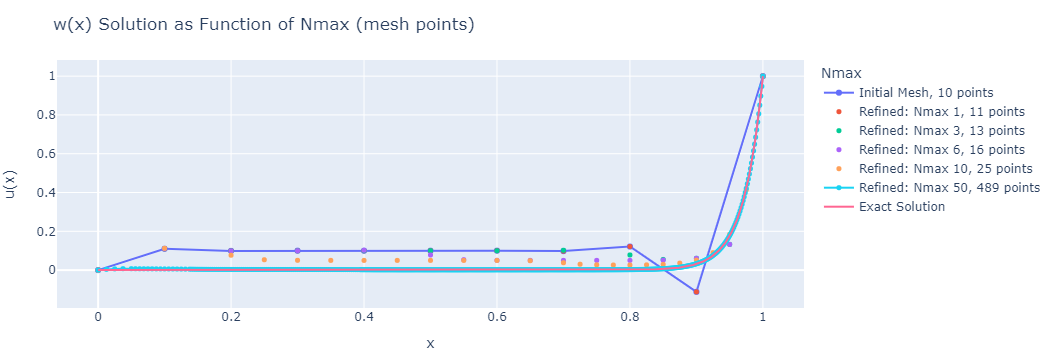

In [8]:
mu, sigma = 10, 12e3
alpha = sqrt(sigma/mu)
uex(x) = (exp(alpha*x) - exp(-alpha*x)) /(exp(alpha) - exp(-alpha))
xe = 0:0.001:1

p(x) = mu
r(x) = sigma  # sigma
f(x) = - sigma * x
g(x,y) = y+x

x, sol, N1,  p1  = SolveEq(1, p, r, f,  0, g);   
_, _,   N2,  p2  = SolveEq(3,  p, r, f, 0, g); 
_, _,   N5,  p5  = SolveEq(6,  p, r, f, 0, g);
_, _,   N10, p10 = SolveEq(10, p, r, f, 0, g);
_, _,   N50, p50 = SolveEq(50, p, r, f, 1, g);

p0 = scatter(x=Array(x), y=g(Array(x),sol[:,1]), mode="line", name="Initial Mesh, $N1 points")
pe = scatter(x=xe, y=uex.(xe), mode="line", name="Exact Solution")
plot([p0, p1, p2, p5, p10, p50, pe],
    Layout(title="w(x) Solution as Function of Nmax (mesh points)",  xaxis_title="x",  yaxis_title="u(x)", legend_title_text="Nmax"))